# Exploring Environments
This notebook provides the means to explore different environments in more details and test processing functions interactively

## OpenAI CartPole
This environment is used for testing, to make sure that agents actually are capable of learning something with the models used.

### Environment Observation Frames
The render output of CarPole needs to be processed, so the model (for instance `CommunicationNet`) can use it. The first section looks at the output produced by CartPole and the second one at the processed render frames.

#### Environemnt Render Output

Populating the interactive namespace from numpy and matplotlib
Screen shape: (400, 600, 3)
Example screen rendering:


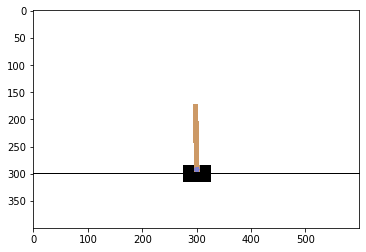

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt
%pylab inline
import gym

env = gym.make('CartPole-v0').unwrapped
env.reset()
screen = env.render(mode='rgb_array')
env.close()

print(f"Screen shape: {screen.shape}")
print(f"Example screen rendering:")
plt.imshow(screen)
plt.show()

To work with the PyTorch models these renderings need to be processed. Hence, the grab screen method has been implemented, which requests the rendered screen from the environment and processes it. In doing so it takes into account the current position of the cart to crop the image properly.

Populating the interactive namespace from numpy and matplotlib
processed shape: torch.Size([3, 40, 40])


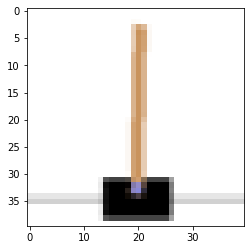

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt
%pylab inline
import gym

from amarl.processing import get_cart_pos_normalized, proc_screen


env = gym.make('CartPole-v0').unwrapped
env.reset()
screen = env.render(mode='rgb_array')
cart_pos = get_cart_pos_normalized(env, screen.shape[1])
env.close()

processed = proc_screen(screen, cart_pos)
print(f"processed shape: {processed.shape}")
plt.imshow(processed.permute(1, 2, 0).numpy())
plt.show()
